# Analyzing Feature importances

In [ ]:
from IPython.core.display import HTML
HTML("<script>Jupyter.notebook.kernel.restart()</script>")

In [1]:
from prediction_grids3 import *

#### Loading simulation data

In [2]:
simulation_name = "fig1b-6561-100"
n_experiments = None
load_hamiltonian_summary = False
simulation = Simulation(simulation_name, n_experiments, load_hamiltonian_summary)

#### Computing Hamiltonian summary

In [3]:
save_to_disk = False
simulation.compute_hamiltonian_summary(save_to_disk)
simulation.hamiltonian_summary

majority vote: 100%|██████████| 6561/6561 [00:00<00:00, 27532.24it/s]


,t1,t2,type_of,-1,0,1,2,phase,pred_phase
id,,,,,,,,,
0,-2.0,-2.00,test,0.2131,0.4736,0.2724,0.0409,999,0
1,-2.0,-1.95,test,0.2171,0.4924,0.2577,0.0328,-1,0
2,-2.0,-1.90,test,0.2182,0.4680,0.2834,0.0304,-1,0
3,-2.0,-1.85,test,0.2448,0.3972,0.3271,0.0309,-1,0
4,-2.0,-1.80,test,0.2444,0.4076,0.3277,0.0203,-1,0
5,-2.0,-1.75,test,0.2527,0.4271,0.3032,0.0170,-1,0
6,-2.0,-1.70,test,0.2744,0.4126,0.2923,0.0207,-1,0
7,-2.0,-1.65,test,0.2993,0.3781,0.3020,0.0206,-1,0
8,-2.0,-1.60,test,0.3375,0.3454,0.2910,0.0261,-1,0


#### Computing mean simulation accuracy

In [4]:
save_to_disk = False
simulation.compute_mean_accuracy(save_to_disk)

computing mean accuracies: 100%|██████████| 100/100 [04:29<00:00,  2.41s/it]


In [5]:
simulation.mean_accuracy

{'eigenvector_train': 0.9997201014125318,
 'eigenvector_val': 0.9733354347826086,
 'eigenvector_test': 0.6781416763678696,
 'hamiltonian_train': 1.0,
 'hamiltonian_val': 0.9972391304347826,
 'hamiltonian_test': 0.8821187427240977}

#### Computing bootstrap accuracy

In [6]:
save_to_disk = False
simulation.compute_bootstrap_accuracy(save_to_disk)

In [7]:
simulation.bootstrap_accuracy

{'hamiltonian_train': 1.0,
 'hamiltonian_val': 1.0,
 'hamiltonian_test': 0.8940628637951106}

#### Computing mean feature importances

In [8]:
save_to_disk = False
simulation.compute_mean_feature_importance(save_to_disk)

mean feature importances: 100%|██████████| 100/100 [03:48<00:00,  1.87s/it]


In [9]:
simulation.feature_importance

{2: 0.028427408048424852,
 99: 0.02815933374151633,
 1: 0.024729319315382924,
 100: 0.024545087540736806,
 97: 0.01901977380795366,
 4: 0.018992635469493063,
 3: 0.017770337353135903,
 98: 0.017728554573214497,
 95: 0.017537770209282613,
 6: 0.01744255783203775,
 49: 0.01603621758453101,
 5: 0.015634656082342258,
 96: 0.015411606549639802,
 52: 0.015365088082203887,
 51: 0.014298048447592556,
 50: 0.013703119792601914,
 47: 0.013154062350233088,
 54: 0.012610602418065647,
 93: 0.012460407612018096,
 8: 0.012355290402924147,
 94: 0.011527223127471392,
 7: 0.011522505444293901,
 53: 0.011341430742355862,
 48: 0.010900202929302348,
 45: 0.01069139640306634,
 56: 0.010294429825004154,
 91: 0.01004766261463209,
 10: 0.010010714122549764,
 55: 0.009551685029462461,
 46: 0.009272022722135924,
 43: 0.00913563227640719,
 9: 0.00912241710476403,
 11: 0.009064745077475676,
 92: 0.009054197700200604,
 90: 0.008994333237257198,
 58: 0.00884064766230169,
 89: 0.008782647789438302,
 12: 0.00870225290

#### Plotting feature importances

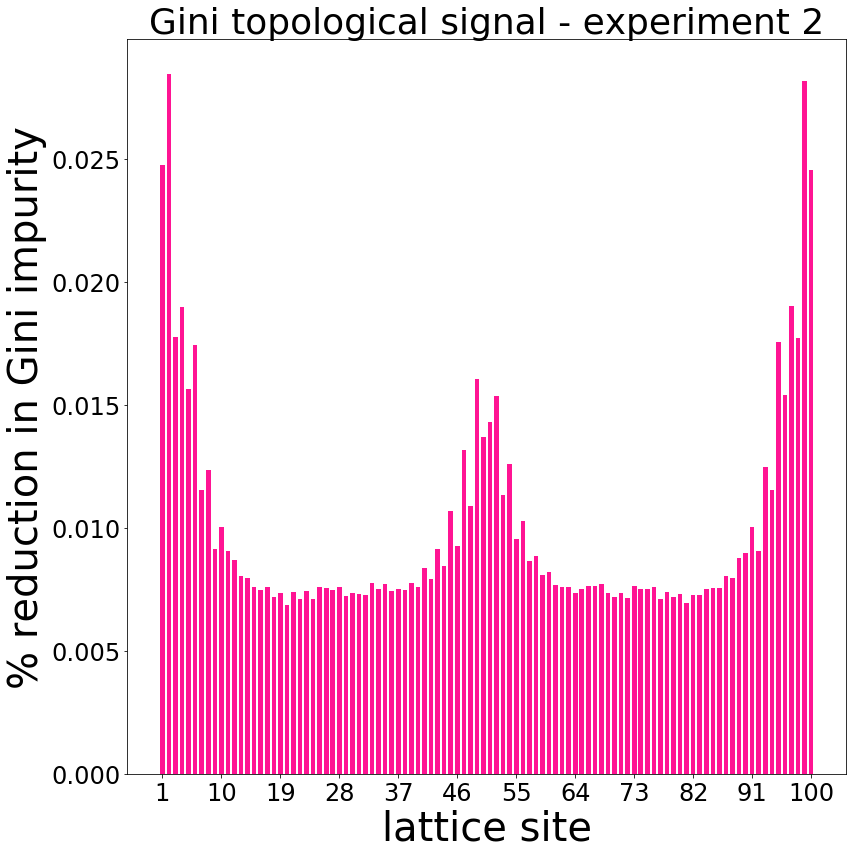

In [10]:
#plot_feature_importances(self, n_features=None, fig_params={}, xlabel_params={}, ylabel_params={}, title_params={})
n_features = None
bar_params = {"color": "deeppink", "width": 0.7}
fig_params={"figsize": (12,12)} 
xlabel_params = {"xlabel": "lattice site", "fontsize": 40}
ylabel_params = {"ylabel": "% reduction in Gini impurity", "fontsize": 40}
title_params = {"label": "Gini topological signal - experiment 2", "fontsize": 36}
#title_params = {"label": "Lattice site importances", "fontsize": 20}
#xlim_params = {"left": 0, "right": len(simulation.feature_importance)}
#ylim_params = {"bottom": 0, "top": 0.2}
#xlim_params = {"left": 0, "right": 99}
xlim_params = {}
ylim_params = {}
xticks_params = {"ticks": np.linspace(1,100,12).astype(int), "fontsize": 24}
yticks_params = {"fontsize": 24}
tight_params = {}
path_to_save = "./fig1b-6561-100-feature_importances.png"
savefig_params = {"fname": path_to_save}
simulation.plot_feature_importances(n_features, bar_params, fig_params, xlabel_params, ylabel_params, title_params, xlim_params, \
                                    ylim_params, xticks_params, yticks_params, tight_params, savefig_params)


#### Plotting cumulative feature importances

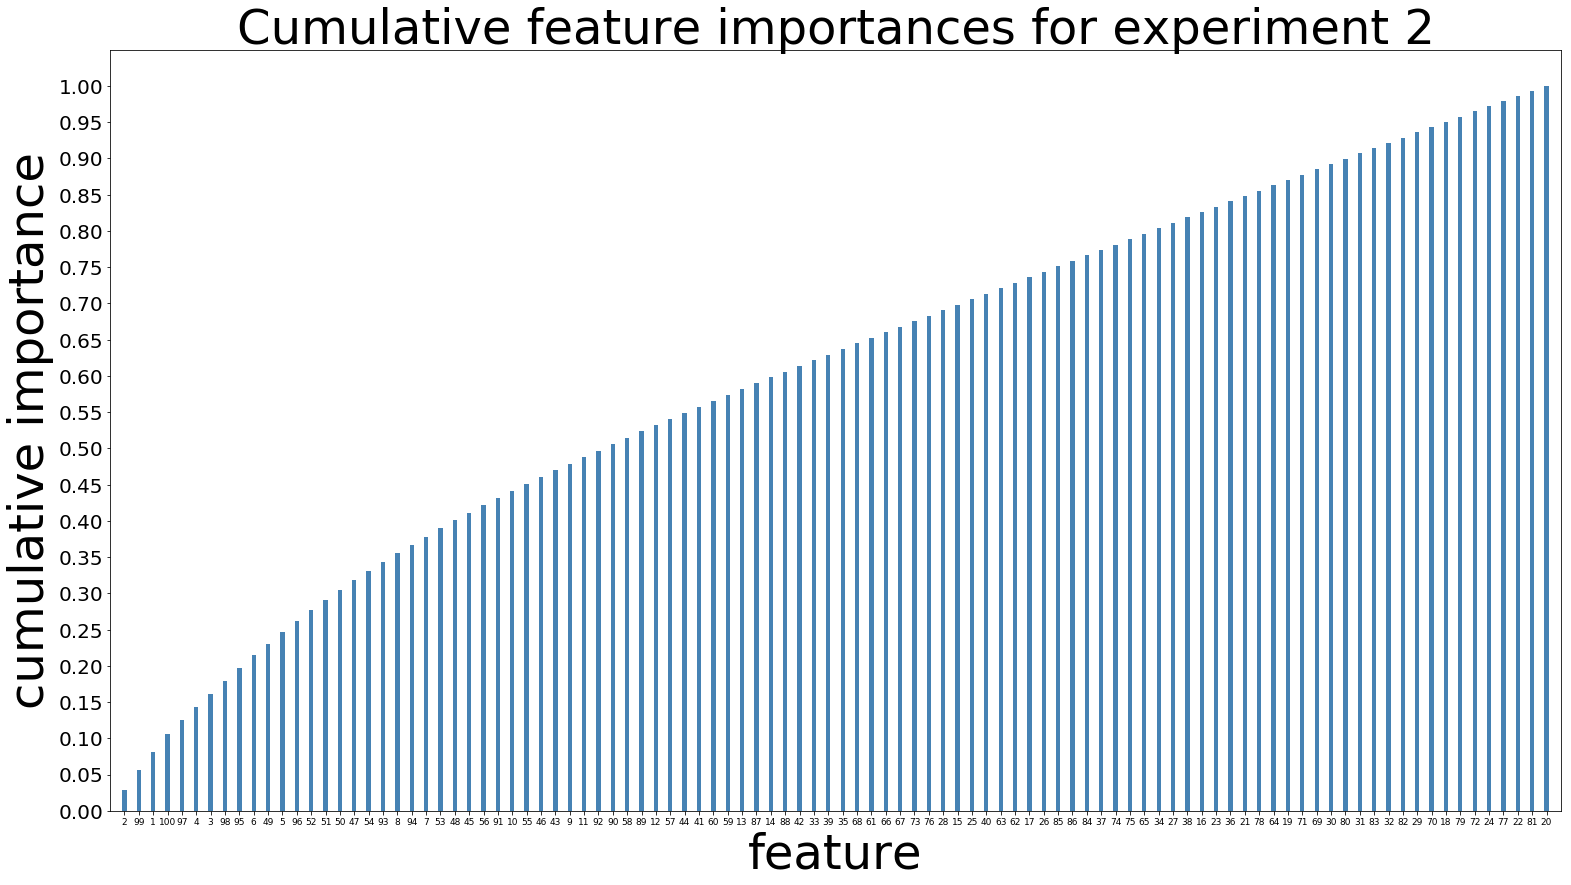

In [16]:
n_features = None
bar_params = {"color":"steelblue", "width": 0.3}
fig_params={"figsize": (26,14)} 
xlabel_params = {"xlabel": "feature", "fontsize": 48}
ylabel_params = {"ylabel": "cumulative importance", "fontsize": 48}
title_params = {"label": "Cumulative feature importances for experiment 2", "fontsize": 48}
#title_params = {"label": "Lattice site importances", "fontsize": 20}
#xlim_params = {"left": 0, "right": len(simulation.feature_importance)}
#ylim_params = {"bottom": 0, "top": 0.2}
#xlim_params = {"left": 0, "right": 99}
xlim_params = {"left":-1, "right":100}
#xlim_params = {}
ylim_params = {}
#xticks_params = {"ticks": np.array(list(simulation.cumulative_feature_importance.keys()))[np.linspace(0,99,16).astype(int)] }
xticks_params = {"ticks": np.linspace(0,99,100).astype(int), "fontsize": 9, "rotation": 0}
yticks_params = {"ticks": np.linspace(0,1,21), "fontsize": 20}
path_to_save = "/home/linneu/Dropbox/Machine/paper_linneu/fig1b-6561-100-cumulative_feature_importances.png"
savefig_params = {"fname": path_to_save}
simulation.plot_cumulative_feature_importances(n_features, bar_params, fig_params, xlabel_params, ylabel_params, title_params, xlim_params, \
                                    ylim_params, xticks_params, yticks_params, savefig_params)


#### Loading experiment

In [2]:
simulation_dir = "./simulation/fig1a-6561"
experiment_name = "0"
experiment = Experiment(simulation_dir, experiment_name)

#### Model

In [3]:
experiment.model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

#### Feature importances

In [4]:
experiment.model.feature_importances_

array([1.78298816e-01, 5.75113954e-03, 1.92582682e-02, 1.49519112e-01,
       1.87213607e-03, 2.03794339e-03, 6.09441153e-03, 1.94182152e-03,
       2.56788705e-03, 5.48626365e-03, 1.09656719e-03, 9.45466183e-03,
       8.78168451e-04, 3.62419859e-04, 6.99514915e-04, 1.22864701e-02,
       1.03892791e-03, 3.93394636e-04, 5.17419154e-04, 1.02709941e-02,
       3.39143795e-03, 4.82379261e-04, 1.06964953e-03, 8.14483475e-03,
       1.50211074e-03, 1.05260892e-02, 1.17114890e-03, 9.48095662e-03,
       2.20638672e-03, 4.14044515e-04, 9.57759374e-04, 4.29786834e-03,
       1.07405186e-03, 3.17501479e-04, 2.23310902e-04, 3.85270188e-03,
       5.19630181e-04, 5.18054794e-04, 9.59014473e-04, 1.01503186e-03,
       5.65002673e-04, 1.03372331e-03, 3.61939870e-04, 1.73404264e-02,
       1.46499481e-03, 1.23092461e-03, 4.83760465e-03, 1.63086639e-02,
       5.00046694e-03, 5.70446756e-04, 1.76192622e-01, 1.44935387e-01,
       7.72793273e-04, 3.67663187e-03, 6.00596634e-04, 1.71365380e-02,
      

In [8]:
features_sorted_by_importance = np.argsort(experiment.model.feature_importances_)[::-1]
features_sorted_by_importance

array([ 0, 50,  3, 51,  2, 43, 55, 59, 47, 71, 67, 95, 15, 25, 19, 94, 27,
       11, 23, 98, 91,  6,  1, 83,  9, 48, 75, 46, 70, 31, 74, 63, 99, 35,
       53, 20, 93,  8, 68, 28, 90,  5,  7,  4, 79, 56, 57, 24, 62, 44, 58,
       76, 60, 82, 96, 45, 26, 61, 84, 10, 32, 22, 16, 41, 39, 72, 38, 30,
       64, 66, 77, 65, 12, 85, 81, 87, 97, 52, 14, 86, 92, 54, 80, 49, 88,
       40, 36, 37, 18, 21, 89, 29, 17, 13, 42, 78, 33, 69, 34, 73])

In [9]:
experiment.model.feature_importances_[features_sorted_by_importance]

array([1.78298816e-01, 1.76192622e-01, 1.49519112e-01, 1.44935387e-01,
       1.92582682e-02, 1.73404264e-02, 1.71365380e-02, 1.71124514e-02,
       1.63086639e-02, 1.51641235e-02, 1.49662269e-02, 1.27488434e-02,
       1.22864701e-02, 1.05260892e-02, 1.02709941e-02, 1.01063009e-02,
       9.48095662e-03, 9.45466183e-03, 8.14483475e-03, 7.85658263e-03,
       6.83981184e-03, 6.09441153e-03, 5.75113954e-03, 5.64665213e-03,
       5.48626365e-03, 5.00046694e-03, 4.92617492e-03, 4.83760465e-03,
       4.61121398e-03, 4.29786834e-03, 4.25263018e-03, 4.07125343e-03,
       3.90629824e-03, 3.85270188e-03, 3.67663187e-03, 3.39143795e-03,
       2.63083720e-03, 2.56788705e-03, 2.37988029e-03, 2.20638672e-03,
       2.08601941e-03, 2.03794339e-03, 1.94182152e-03, 1.87213607e-03,
       1.66772441e-03, 1.66162823e-03, 1.63819261e-03, 1.50211074e-03,
       1.47753012e-03, 1.46499481e-03, 1.36467329e-03, 1.33403638e-03,
       1.29123496e-03, 1.26883342e-03, 1.25117403e-03, 1.23092461e-03,
      

In [10]:
simulation_dir = "./simulation/fig1a-6561"
experiment_name = "1"
experiment = Experiment(simulation_dir, experiment_name)

In [11]:
features_sorted_by_importance = np.argsort(experiment.model.feature_importances_)[::-1]
features_sorted_by_importance

array([ 0,  1,  3, 53,  5, 51, 97, 69, 50, 83, 45, 25, 35, 99, 63, 85, 77,
       81, 27, 93,  8,  9, 57, 98, 48, 68, 23, 61, 37,  4, 96, 55,  7, 43,
       21, 82, 52,  2, 32, 60, 17, 19, 73, 24, 84, 79, 56, 72, 39, 29, 91,
       92, 89, 87, 80, 13, 86, 74, 16, 31, 95, 10, 33, 58, 88, 36, 30, 75,
       49, 46, 65, 67, 71, 40, 28, 78, 22, 59, 12, 15, 47, 90,  6, 11, 18,
       62, 41, 64, 34, 94, 76, 66, 54, 70, 26, 44, 20, 14, 42, 38])

In [12]:
simulation_dir = "./simulation/fig1a-6561"
experiment_name = "2"
experiment = Experiment(simulation_dir, experiment_name)

In [13]:
features_sorted_by_importance = np.argsort(experiment.model.feature_importances_)[::-1]
features_sorted_by_importance

array([ 0,  3, 50, 51,  1, 99, 98, 11, 35, 95, 91, 71, 53,  2, 59, 76, 79,
       19, 43, 83,  7, 75, 55,  4, 67, 47, 62, 46, 87, 84, 77, 58, 74, 18,
        6, 42, 82, 31, 48, 54, 65, 96, 27, 94, 23, 68, 44, 22,  5, 16, 90,
       69, 86, 66,  8, 28, 34, 26, 10, 36, 14, 73, 61, 52, 80, 38, 12, 64,
       70, 40, 92, 41, 88, 78, 97, 24, 20, 29, 72, 32, 56, 30, 25, 93, 33,
       60, 17, 37, 63, 15, 81,  9, 57, 21, 85, 45, 89, 49, 13, 39])

In [14]:
simulation_dir = "./simulation/fig1a-6561"
experiment_name = "3"
experiment = Experiment(simulation_dir, experiment_name)

In [15]:
features_sorted_by_importance = np.argsort(experiment.model.feature_importances_)[::-1]
features_sorted_by_importance

array([ 0, 50,  3, 51,  1, 99, 75, 89, 95, 35, 59, 23,  7, 27,  4, 25, 93,
       79, 15, 19, 67, 69, 97, 98, 55, 71, 43, 31,  5, 53, 46, 77, 72, 74,
       88, 66, 12, 82, 18, 26, 11, 91, 41, 30, 96,  2, 80, 48, 10, 76, 94,
       24, 87, 70, 42, 40, 16, 54, 20, 34, 60, 21, 86, 49, 63, 83, 56, 39,
       92, 52,  8, 14, 44,  6, 13, 38, 29, 65, 57, 28, 64, 68, 36, 45, 22,
       32, 58, 84, 62, 90, 85, 78, 61, 17,  9, 33, 81, 47, 37, 73])

In [16]:
simulation_dir = "./simulation/fig1a-6561"
experiment_name = "4"
experiment = Experiment(simulation_dir, experiment_name)

In [17]:
features_sorted_by_importance = np.argsort(experiment.model.feature_importances_)[::-1]
features_sorted_by_importance

array([51,  0, 53,  3, 50, 99, 43, 35, 83, 19, 55, 49, 31, 85, 27, 91,  1,
       47, 70, 48, 73, 14, 98, 75, 95, 59, 46,  7, 88, 82, 54, 11, 15, 90,
        5, 71,  4,  2, 30, 67, 13, 12, 68, 37, 40, 52, 60, 77, 92, 96, 32,
       29, 34, 23, 16, 26, 24, 87, 10,  8, 45, 20, 61, 22, 38, 56, 72, 18,
       58, 86, 41, 76, 25, 21, 42, 36, 84, 89, 97, 44, 79, 94,  9, 63,  6,
       93, 57, 78, 33, 28, 81, 62, 74, 64, 17, 66, 65, 80, 39, 69])

In [ ]:
######### feature importances 
#importances = tree_clf.feature_importances_
#sorted_indices = np.argsort(importances)[::-1]
#sorted_importances = importances[sorted_indices]
#cumulative_importances = np.cumsum(sorted_importances)
sorted_indices, sorted_importances, cumulative_importances = \
plot_feature_importances(tree_clf, n_features = "all", return_arrays = True)

In [1]:
experiment.model.feature_importances_

NameError: name 'experiment' is not defined

In [ ]:
a = np.array([])
b =  np.array([1,2,3])
c = np.vstack

In [8]:
ar = np.array([[1,2,3], [4,5,6]])
ar2 = [np.array([1,2,3]), np.array([4,5,6])]
np.mean(ar2,axis = 0)

array([2.5, 3.5, 4.5])

In [9]:
np.mean(ar2,axis = 0)

array([2.5, 3.5, 4.5])